<a href="https://colab.research.google.com/github/garfield-gray/MachineLearning/blob/main/pytorch/0_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [3]:
t = torch.tensor([[1,2,3],[4,5,6]])
t.shape

torch.Size([2, 3])

In [4]:
im = torch.rand((224,224,3))
z = torch.zeros_like(im)
o = torch.ones_like(im)

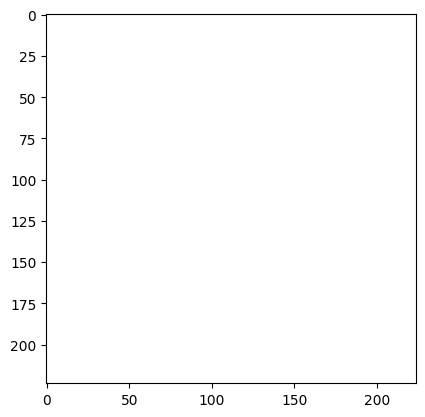

In [5]:
# prompt: show im as image

plt.imshow(o)
plt.show()


In [6]:
%%time
torch.rand((10000,10000))

CPU times: user 723 ms, sys: 261 ms, total: 984 ms
Wall time: 991 ms


tensor([[0.4105, 0.4014, 0.6505,  ..., 0.7586, 0.9848, 0.9800],
        [0.7167, 0.6576, 0.9109,  ..., 0.1899, 0.8454, 0.7840],
        [0.5259, 0.4563, 0.1742,  ..., 0.8790, 0.0798, 0.0901],
        ...,
        [0.3899, 0.8762, 0.6897,  ..., 0.5036, 0.3915, 0.8433],
        [0.8138, 0.0997, 0.2026,  ..., 0.8074, 0.3271, 0.1563],
        [0.7852, 0.8664, 0.7618,  ..., 0.4082, 0.7843, 0.0809]])

In [30]:
x = torch.arange(0,100, 0.01).reshape(100,100)
y = np.arange(10000).reshape(100,100)
x.device

device(type='cpu')

In [31]:
%%time
x@x
1

CPU times: user 940 µs, sys: 997 µs, total: 1.94 ms
Wall time: 26.1 ms


1

In [15]:
%%time
y@y
1

CPU times: user 1.4 ms, sys: 44 µs, total: 1.44 ms
Wall time: 1.45 ms


1

In [10]:
%%time
z = np.zeros((100,100))
for i in range(100):
  for j in range(100):
    for k in range(100):
      z[i,j] += x[i,k] * x[k,j]


CPU times: user 33.9 s, sys: 66 ms, total: 34 s
Wall time: 38.4 s


In [11]:
x = torch.arange(12).reshape(3,4)
x = x.unsqueeze(dim=0)
x.shape

torch.Size([1, 3, 4])

In [12]:
x.squeeze()

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [13]:
x.permute(0,2,1)

tensor([[[ 0,  4,  8],
         [ 1,  5,  9],
         [ 2,  6, 10],
         [ 3,  7, 11]]])

In [3]:
# going with gpu pr tpu!
torch.cuda.is_available()

True

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [26]:
x = torch.arange(0,100, 0.01).reshape(100,100).to(device)
x.device

device(type='cuda', index=0)

In [28]:
%%time
x@x
1

CPU times: user 258 µs, sys: 0 ns, total: 258 µs
Wall time: 267 µs


1

In [3]:
# prompt: do the calculation of x = torch.arange(0,100, 0.01).reshape(100,100).to(device)
# x@x on tpu

import torch

try:
  import torch_xla.core.xla_model as xm
  device = xm.xla_device()
  print("TPU is available.")
  x = torch.arange(0,100, 0.01).reshape(100,100).to(device)
  print(x.device)
  %%time
  x@x
  1
except:
  print("TPU is not available.")


TPU is available.
xla:0
TPU is not available.


In [4]:
import torch_xla.core.xla_model as xm
device = xm.xla_device()
print("TPU is available.")
x = torch.arange(0,100, 0.01).reshape(100,100).to(device)
print(x.device)


TPU is available.
xla:0


In [5]:
%%time
x@x
1

CPU times: user 1 ms, sys: 155 µs, total: 1.16 ms
Wall time: 830 µs


1

In [4]:
!tpu-info

TPU Chips                                     
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━┓
┃ Chip        ┃ Type        ┃ Devices ┃ PID  ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━┩
│ /dev/accel0 │ TPU v2 chip │ 2       │ None │
│ /dev/accel1 │ TPU v2 chip │ 2       │ None │
│ /dev/accel2 │ TPU v2 chip │ 2       │ None │
│ /dev/accel3 │ TPU v2 chip │ 2       │ None │
└─────────────┴─────────────┴─────────┴──────┘
Libtpu metrics unavailable. Is there a framework using the TPU? See https://github.com/google/cloud-accelerator-diagnostics/tree/main/tpu_info for more information
